# Assignment 1

## André Dias (59452); Tiago Rodrigues (49593)

# Problem 2

### Consider the following NN with logistic functions of parameter a = 1 in the three neurons:
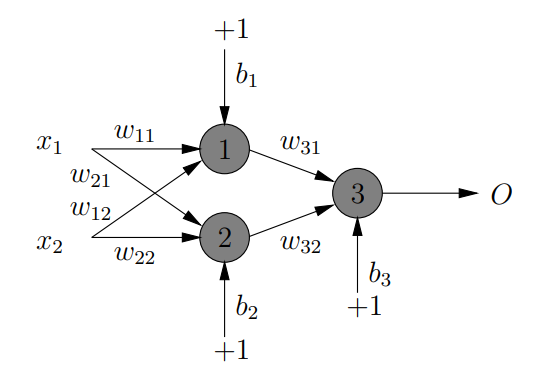

### a) Run an implementation of the backpropagation algorithm over this model to learn the XOR problem. Experiment with and without momentum, and with logistic, tanh and ReLU.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [2]:
# Make the dataset
x = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
y = np.array([[0],[1],[1],[0]], "float32")

In [3]:
def modellingSequential(activation_functions, verbose_val):
    fig, axs = plt.subplots(3, 2, figsize=(8, 18))
    count = 0
    results_dict = {}
    for activation_func in activation_functions:
        count2 = 0
        print('Using the ' + str(activation_func) + ' activation function:')
        results_dict[activation_func] = {}
        model = Sequential()
        model.add(Dense(2, activation = activation_func))
        model.add(Dense(1, activation = activation_func))
        for momentum_val in np.arange(0, 1.1, 0.1):
            model.compile(loss = "mean_squared_error", 
                  optimizer = SGD(learning_rate = 0.1, momentum = momentum_val), 
                  metrics = ["accuracy"])
            model.fit(x, y, epochs = 5000, batch_size = 1, verbose = verbose_val)
            print('For momentum = ' + str(round(momentum_val, 2)))
            results_dict[activation_func][momentum_val] = model.evaluate(x,y, return_dict = True)
            #print((model.predict(x) > 0.5).astype("int32"))
        for momentum_val in results_dict[activation_func].keys():
            axs[count, count2].scatter(momentum_val, results_dict[activation_func][momentum_val]['accuracy'])
            axs[count, count2].set_ylim(0, 1.1)
            axs[count, count2].set_xlabel('Momentum')
            axs[count, count2].set_ylabel('Accuracy')
            axs[count, count2].set_title(str(activation_func) + ' (Accuracy)')
        count2 += 1
        for momentum_val in results_dict[activation_func].keys():
            axs[count, count2].scatter(momentum_val, results_dict[activation_func][momentum_val]['loss'])
            axs[count, count2].set_ylim(0, 0.52)
            axs[count, count2].set_xlabel('Momentum')
            axs[count, count2].set_ylabel('Loss')
            axs[count, count2].set_title(str(activation_func)+ ' (Loss)')
        count += 1
    dataframe = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in results_dict.items()}, axis = 1)
    dataframe = dataframe.reset_index().rename(columns={"index": "Momentum"}).style.hide(axis='index')
    return dataframe

Using the sigmoid activation function:
For momentum = 0.0
1/1 [==============================] - 0s 104ms/step - loss: 0.2313 - accuracy: 0.7500
For momentum = 0.1
1/1 [==============================] - 0s 68ms/step - loss: 0.0017 - accuracy: 1.0000
For momentum = 0.2
1/1 [==============================] - 0s 69ms/step - loss: 6.4813e-04 - accuracy: 1.0000
For momentum = 0.3
1/1 [==============================] - 0s 68ms/step - loss: 3.7504e-04 - accuracy: 1.0000
For momentum = 0.4
1/1 [==============================] - 0s 71ms/step - loss: 2.4990e-04 - accuracy: 1.0000
For momentum = 0.5
1/1 [==============================] - 0s 68ms/step - loss: 1.7781e-04 - accuracy: 1.0000
For momentum = 0.6
1/1 [==============================] - 0s 66ms/step - loss: 1.3037e-04 - accuracy: 1.0000
For momentum = 0.7
1/1 [==============================] - 0s 67ms/step - loss: 9.5971e-05 - accuracy: 1.0000
For momentum = 0.8
1/1 [==============================] - 0s 67ms/step - loss: 6.8613e-05 - accu

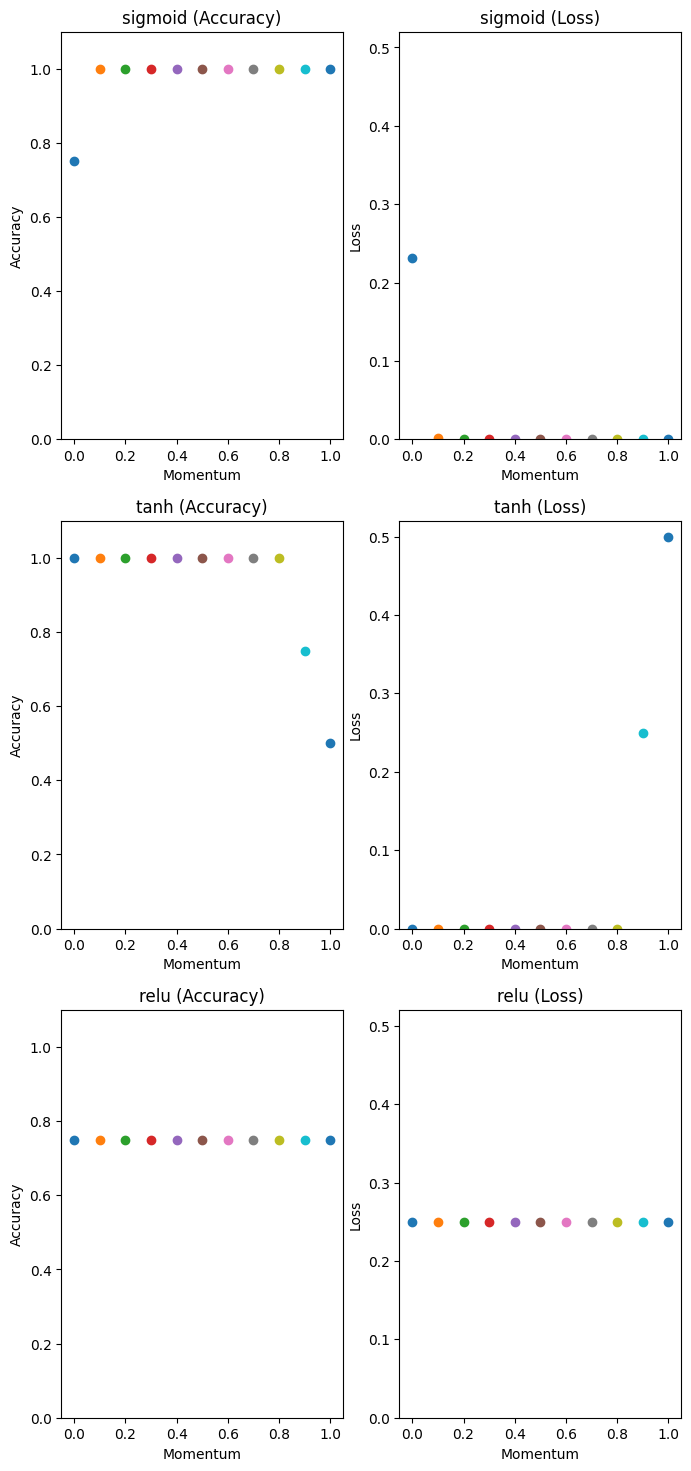

In [4]:
dataframe = modellingSequential(["sigmoid", "tanh", "relu"], 0)
dataframe

### Discussion of results
By definition, the Accuracy score is the number of correct predictions obtained and the Loss is the penalty for a bad prediction. The idea is to minimize this loss between the predicted and target outputs. Momentum is a technique used in the optimization step of the backpropagation algorithm to accelerate the convergence of the algorithm by adding a fraction of the previous weight update to the current weight update.

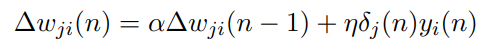

From the obtained results, it is possible to observe that when comparing all the activation functions, the one's that better solve this problem are the sigmoid activation function with momentum = 1.0 and the tanh activation function with momentum = 0.8.

When analysing the effect of momentum on each of the utilized activation functions, the following can be concluded: 

(1) Regarding the sigmoid activation function, the utilization of momentum has a positive effect of the model, by increasing accuracy and lowering loss. When it comes to accuracy, this effect reaches a plateou around a momentum value = 0.1, after which further momentum increase does not lead to better accuracy since it reaches the maximum possible value. When it comes to the loss function, momentum increase leads to a decrease of the loss with momentum = 1.0, having the lowest loss of values tested. Overall, momentum is very beneficial for the models using the sigmoid activation function.

(2) Regarding the tanh activation function, momentum is not seen having a positive impact in the models accuracy, since the accuracy is already 1 without any momentum. The opposite effect is actually seen for high momentum values (0.9 and 1.0) where a decrease in model accuracy and increase in loss is seen. Regarding the loss function, momentum also tends to lower the loss of the models up until the beforementioned high momentum values. Overall, momentum is beneficial for the models using the tanh activation function up until a momentum value = 0.8.

(3) Regarding the relu activation function, momentum does not seem to have an effect in neither the accuracy nor the loss of the models.

### b) Run also the algorithm over the NN of Problem 1 and compare results.

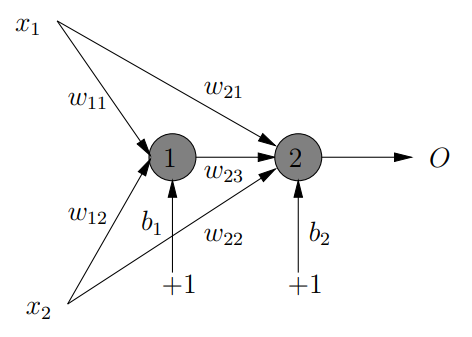

In [5]:
def modellingModel(activation_functions, verbose_val):
    fig, axs = plt.subplots(3, 2, figsize=(8, 18))
    count = 0
    results_dict = {}
    for activation_func in activation_functions:
        count2 = 0
        print('Using the ' + str(activation_func) + ' activation function:')
        results_dict[activation_func] = {}
        inputs = Input(shape = (2,))
        out = Dense(1, activation = activation_func)(inputs)
        o = Concatenate(axis = 1)([out, inputs])
        out2 = Dense(1, activation = activation_func)(o)
        model = Model(inputs = inputs, outputs = out2)
        for momentum_val in np.arange(0, 1.1, 0.1):
            model.compile(loss = "mean_squared_error", 
                  optimizer = SGD(learning_rate = 0.1, momentum = momentum_val), 
                  metrics = ["accuracy"])
            model.fit(x, y, epochs = 5000, batch_size = 1, verbose = verbose_val)
            print('For momentum = ' + str(round(momentum_val, 2)))
            results_dict[activation_func][momentum_val] = model.evaluate(x,y, return_dict = True)
            #print((model.predict(x) > 0.5).astype("int32"))
        for momentum_val in results_dict[activation_func].keys():
            axs[count, count2].scatter(momentum_val, results_dict[activation_func][momentum_val]['accuracy'])
            axs[count, count2].set_ylim(0, 1.1)
            axs[count, count2].set_xlabel('Momentum')
            axs[count, count2].set_ylabel('Accuracy')
            axs[count, count2].set_title(str(activation_func) + ' (Accuracy)')
        count2 += 1
        for momentum_val in results_dict[activation_func].keys():
            axs[count, count2].scatter(momentum_val, results_dict[activation_func][momentum_val]['loss'])
            axs[count, count2].set_ylim(0, 0.52)
            axs[count, count2].set_xlabel('Momentum')
            axs[count, count2].set_ylabel('Loss')
            axs[count, count2].set_title(str(activation_func)+ ' (Loss)')
        count += 1
    dataframe = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in results_dict.items()}, axis = 1)
    dataframe = dataframe.reset_index().rename(columns={"index": "Momentum"}).style.hide(axis='index')
    return dataframe

Using the sigmoid activation function:
For momentum = 0.0
1/1 [==============================] - 0s 67ms/step - loss: 0.0054 - accuracy: 1.0000
For momentum = 0.1
1/1 [==============================] - 0s 67ms/step - loss: 0.0020 - accuracy: 1.0000
For momentum = 0.2
1/1 [==============================] - 0s 66ms/step - loss: 0.0012 - accuracy: 1.0000
For momentum = 0.3
1/1 [==============================] - 0s 67ms/step - loss: 7.7741e-04 - accuracy: 1.0000
For momentum = 0.4
1/1 [==============================] - 0s 70ms/step - loss: 5.5927e-04 - accuracy: 1.0000
For momentum = 0.5
1/1 [==============================] - 0s 69ms/step - loss: 4.1745e-04 - accuracy: 1.0000
For momentum = 0.6
1/1 [==============================] - 0s 69ms/step - loss: 3.1644e-04 - accuracy: 1.0000
For momentum = 0.7
1/1 [==============================] - 0s 66ms/step - loss: 2.3893e-04 - accuracy: 1.0000
For momentum = 0.8
1/1 [==============================] - 0s 70ms/step - loss: 1.7448e-04 - accuracy:

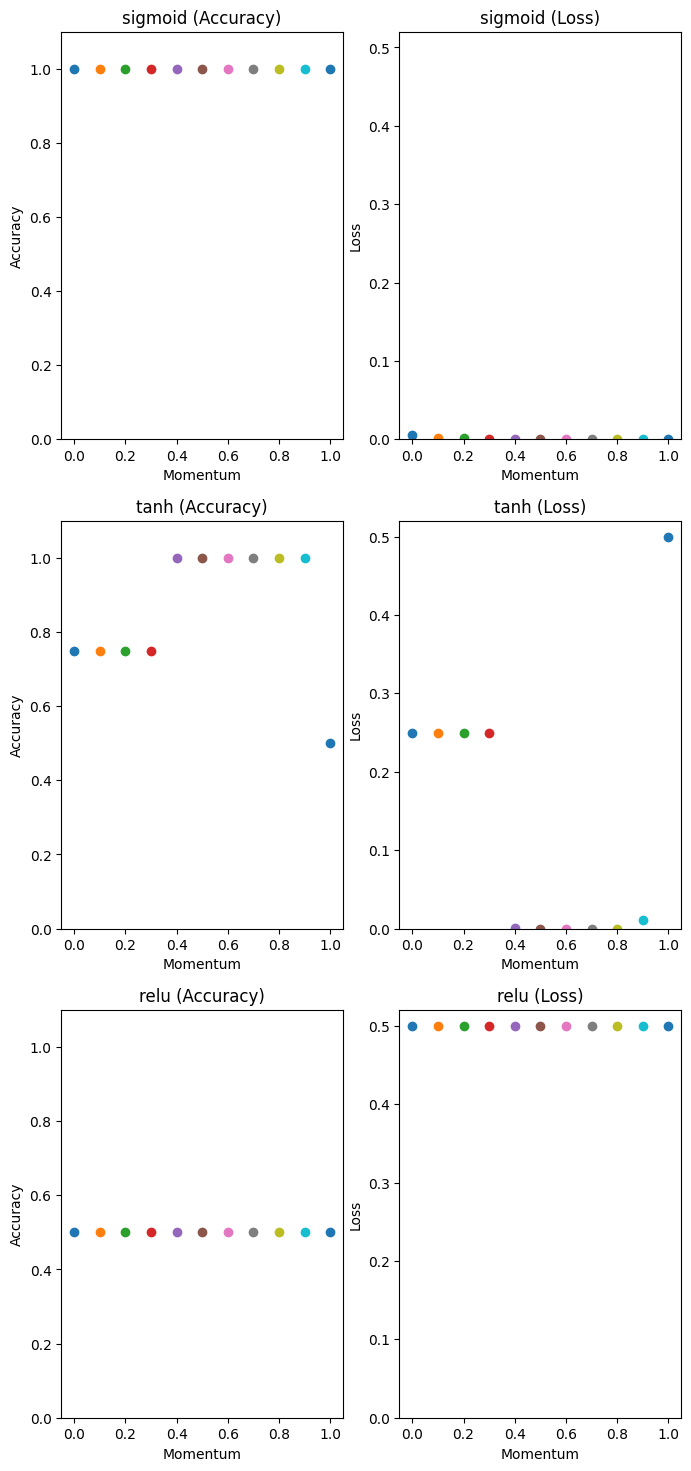

In [6]:
dataframe = modellingModel(["sigmoid", "tanh", "relu"], 0)
dataframe

### Discussion of results

The results obtained using the neural network of exercise (1) show that, once again, the best models are obtained using either the sigmoid activation function with momentum = 1.0 or the tanh activation function with momentum = 0.8. 

When analysing the effect of momentum on each of the utilized activation functions, the following can be concluded: 

(1) Regarding the sigmoid activation function, the momentum value impact on accuracy cannot be completely analized, as the accuracy is always 1, but an increase in momentum leads to a continuous decrease of the loss, with momentum = 1.0 having the lowest loss for the tested conditions. Overall, momentum seems to be beneficial for this neural network using the sigmoid activation function.

(2) Regarding the tanh activation function, momentum seems to have a positive effect on the accuracy and loss of the model, as seen by the increase in accuracy and decrease in loss, up until a momentum of 0.8. At a momentum of 0.9, a slight increase in the loss is seen and at 1.0, both the model accuracy and loss are negatively impacted. Overall, momentum seems to be beneficial for the tested models up until a momentum = 0.8.

(3) Regarding the relu activation function, momentum does not seem to have an effect in neither model accuracy nor loss.

When compared to the neural network of a), the best models occur under the same under conditions. Furthermore, the effect of momentum on the models using each activation function is also identical. There are slight differences in some models' accuracy and loss but these may arise from different initial weight values. This is supported by the fact that running the code again without any set seed leads to slightly different results.